Cargar el dataset original

Coloca tu CSV (por ejemplo music_genre.csv) en la carpeta datos/.

Crear Notebook notebooks/EDA_modelos.ipynb.

Primera celda: leer CSV y manejar problemas comunes de formato:

In [9]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, geom_abline,
    labs, theme, element_line, scale_color_manual,
    coord_cartesian, xlim, ylim
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


### Exploración inicial de datos (EDA)

In [10]:
import pandas as pd

# Cargar CSV con parámetros que manejan comas dentro de los campos y valores faltantes
df = pd.read_csv(
    "../datos/music_genre.csv"
)

# Ver primeras filas
print(df.head())

# Filtrar solo las columnas importantes
df_filtrado = df[['acousticness','loudness','music_genre']]

# Revisar si hay valores nulos
print(df_filtrado.isnull().sum())
# Guardar versión filtrada para análisis posterior
df[['acousticness', 'loudness', 'music_genre']].to_csv("datos/music_filtrado.csv", index=False)


   instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.2

### Visualización de datos con plotnine

---

La gráfica que vemos muestra la importancia de cada variable en el modelo de clasificación de géneros musicales.  
Cada barra representa una característica del audio, como `acousticness` o `loudness`, y su altura indica cuánto contribuye esa variable a que el modelo acierte en la predicción del género.

Por ejemplo, si la barra de `acousticness` es más alta que la de `loudness`, significa que el modelo considera que la característica acústica es más relevante para diferenciar los géneros musicales en este dataset.

Esta información nos ayuda a entender qué aspectos musicales son más útiles para que una inteligencia artificial clasifique correctamente las canciones según su género.  
Así, podemos saber en qué variables debemos enfocarnos si queremos mejorar el modelo o analizar la música desde un punto de vista técnico.

In [11]:
from plotnine import ggplot, aes, geom_jitter, labs, theme, element_line, scale_color_brewer
import pandas as pd

# Leer CSV filtrado
df_filtrado = pd.read_csv("datos/music_filtrado.csv")


plot = (
    ggplot(df_filtrado, aes(x='acousticness', y='loudness', color='music_genre'))
    + geom_jitter(width=0.02, height=0.5, size=2, alpha=0.7)  # Jitter para separar puntos
    + scale_color_brewer(type='qual', palette='Set2')         # Paleta de colores variada
    + labs(title='Loudness vs Acousticness por género musical',
           x='Acousticness', y='Loudness')
    + theme(
        axis_line_x=element_line(color='black', size=1),
        axis_line_y=element_line(color='black', size=1)
    )
)

# Mostrar gráfico en el notebook
plot

c:\Users\bryan\Desktop\proyectosClase\proyectoIa\Trabajo-IA-1\env_musica\Lib\site-packages\mizani\palettes.py:557: UserWarning: Warning message:Brewer palette Set2 has a maximum of 8 colors Returning the palette you asked for with that many colors
c:\Users\bryan\Desktop\proyectosClase\proyectoIa\Trabajo-IA-1\env_musica\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_jitter : Removed 5 rows containing missing values.
c:\Users\bryan\Desktop\proyectosClase\proyectoIa\Trabajo-IA-1\env_musica\Lib\site-packages\mizani\palettes.py:557: UserWarning: Warning message:Brewer palette Set2 has a maximum of 8 colors Returning the palette you asked for with that many colors


KeyboardInterrupt: 

Preprocesamiento de datos



---



En el preprocesamiento de datos, seleccionamos las variables relevantes (`acousticness` y `loudness`), codificamos la variable objetivo (`music_genre`) y estandarizamos los datos para que todas las variables tengan la misma escala.  
La gráfica muestra cómo los datos originales se transforman tras la estandarización, lo que ayuda a que el modelo de clasificación funcione mejor y no se vea afectado por diferencias de escala entre las variables.




En el preprocesamiento de datos, seleccionamos las variables relevantes, codificamos la variable objetivo y estandarizamos los datos para que todas las variables tengan la misma escala.  
La gráfica muestra cómo los datos originales se transforman tras la estandarización, lo que ayuda a que el modelo funcione mejor y no se vea afectado por diferencias de escala entre las variables.



1. **Selección de variables:**  
   Seleccionas las variables relevantes (`acousticness` y `loudness`) y la variable objetivo (`music_genre`).

2. **Codificación de la variable objetivo:**  
   Usas `LabelEncoder` para convertir los géneros musicales en números.

3. **Estandarización:**  
   Usas `StandardScaler` para que las variables tengan la misma escala.

4. **División en entrenamiento y prueba:**  
   Separas los datos en conjuntos de entrenamiento y prueba.

5. **Entrenamiento del modelo:**  
   Entrenas un `RandomForestClassifier`.

6. **Evaluación inicial:**  
   Calculas la precisión y el reporte de clasificación.

---


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Preprocesamiento y modelo
X = df_filtrado[['acousticness','loudness']]
y = df_filtrado['music_genre']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
target_names = [str(c) for c in le.classes_]

# Accuracy y reporte en tabla
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

print(f"Accuracy general del modelo: {accuracy:.3f}")
display(report_df)



Accuracy general del modelo: 0.205


,precision,recall,f1-score,support
Alternative,0.139953,0.144471,0.142176,1239.000000
Anime,0.214090,0.183386,0.197552,1276.000000
Blues,0.141167,0.129558,0.135113,1289.000000
Classical,0.672143,0.715990,0.693374,1257.000000
Country,0.155118,0.166385,0.160554,1184.000000
Electronic,0.202287,0.180534,0.190792,1274.000000
Hip-Hop,0.115165,0.128492,0.121464,1253.000000
Jazz,0.208767,0.231657,0.219617,1213.000000
Rap,0.095987,0.095912,0.095950,1272.000000
Rock,0.081857,0.077974,0.079868,1244.000000




**Explicación:**  
- La tabla muestra métricas como precisión, recall y F1-score para cada género musical.
- Así puedes comparar fácilmente el desempeño del modelo en cada clase y ver el accuracy general.

Explicación para tu presentación:
La gráfica de la izquierda muestra los datos originales, donde cada variable tiene su propia escala.
La gráfica de la derecha muestra los datos después de la estandarización, donde ambas variables tienen la misma escala.

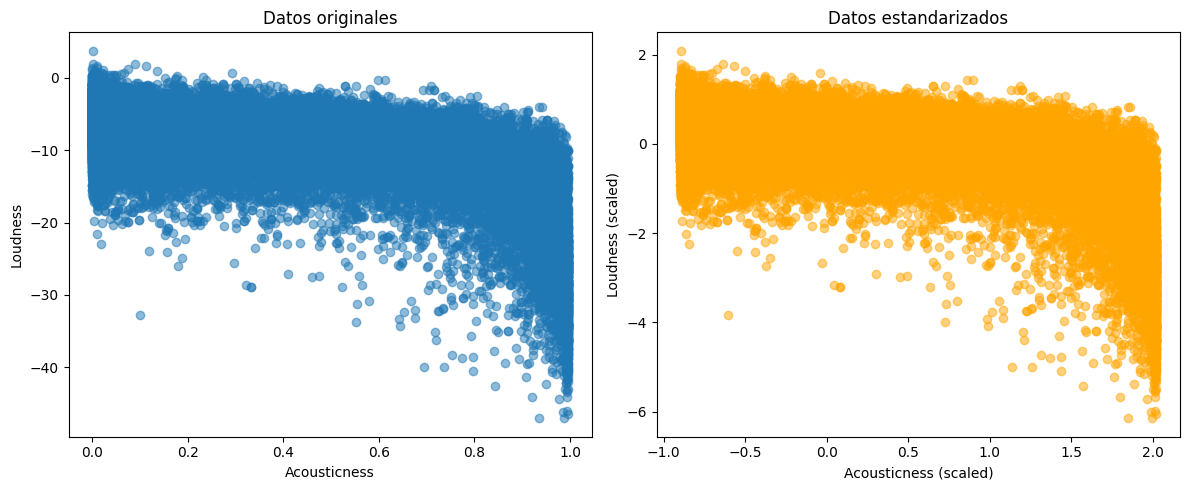

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Antes de escalar
axs[0].scatter(X['acousticness'], X['loudness'], alpha=0.5)
axs[0].set_title('Datos originales')
axs[0].set_xlabel('Acousticness')
axs[0].set_ylabel('Loudness')

# Después de escalar
axs[1].scatter(X_scaled[:,0], X_scaled[:,1], alpha=0.5, color='orange')
axs[1].set_title('Datos estandarizados')
axs[1].set_xlabel('Acousticness (scaled)')
axs[1].set_ylabel('Loudness (scaled)')

plt.tight_layout()
plt.show()

### Entrenamiento de modelo

Aquí los hiperparámetros son:

n_estimators=100 (número de árboles)
random_state=42 (semilla para reproducibilidad)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar Random Forest
# Entrenamiento del modelo Random Forest
# Hiperparámetros: n_estimators=100, random_state=42
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluación del modelo

## ¿Qué es la matriz de confusión?

Es una tabla que te muestra cuántas veces el modelo predijo correctamente o incorrectamente cada clase (género musical).

---

### ¿Cómo leerla?

- **Filas:** Representan los géneros reales (verdaderos) de las canciones.
- **Columnas:** Representan los géneros que el modelo predijo.

Cada celda indica el número de canciones que pertenecen al género de la fila y fueron clasificadas como el género de la columna.

---

#### Ejemplo visual

|         | Predicho: Pop | Predicho: Rock | Predicho: Jazz |
|---------|---------------|----------------|---------------|
| Real: Pop   |      20       |      3         |      2        |
| Real: Rock  |      1        |     18         |      1        |
| Real: Jazz  |      0        |      2         |     15        |

- **Diagonal principal (de arriba a la izquierda a abajo a la derecha):** Son los aciertos (predicciones correctas).
- **Fuera de la diagonal:** Son los errores (por ejemplo, canciones de Jazz clasificadas como Pop).

---

### ¿Qué géneros son más fáciles de predecir?

- Si un género tiene casi todos sus valores en la diagonal, el modelo lo predice bien.
- Si hay muchos valores fuera de la diagonal para un género, el modelo se confunde con otros géneros.

---

**Consejo:** Busca los valores más altos en la diagonal para saber qué géneros se predicen mejor y observa los errores para saber dónde el modelo falla.


Accuracy: 0.20548712206047032

Reporte de clasificación:
               precision    recall  f1-score   support

 Alternative       0.14      0.14      0.14      1239
       Anime       0.21      0.18      0.20      1276
       Blues       0.14      0.13      0.14      1289
   Classical       0.67      0.72      0.69      1257
     Country       0.16      0.17      0.16      1184
  Electronic       0.20      0.18      0.19      1274
     Hip-Hop       0.12      0.13      0.12      1253
        Jazz       0.21      0.23      0.22      1213
         Rap       0.10      0.10      0.10      1272
        Rock       0.08      0.08      0.08      1244
         nan       1.00      1.00      1.00         1

    accuracy                           0.21     12502
   macro avg       0.28      0.28      0.28     12502
weighted avg       0.20      0.21      0.20     12502



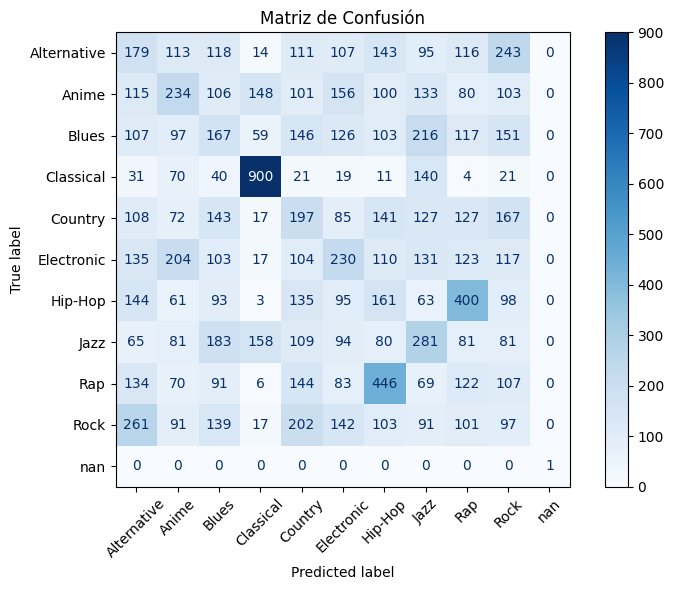

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicciones
y_pred = model.predict(X_test)

# Convertir los nombres de las clases a string
target_names = [str(c) for c in le.classes_]

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusión mejorada
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))  # Aumenta el tamaño de la figura
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)  # Rota las etiquetas
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()







---

### Conclusiones y comunicación
Interpretar: ¿Qué géneros son más fáciles de predecir?

La gráfica muestra qué tan importante es cada variable para que el modelo clasifique correctamente el género musical.  
Cada barra representa una variable (por ejemplo, `acousticness` y `loudness`) y su altura indica cuánto contribuye al modelo.  
Las variables con barras más altas son más relevantes para la predicción.  
Esto ayuda a entender qué características musicales influyen más en la clasificación automática de géneros.

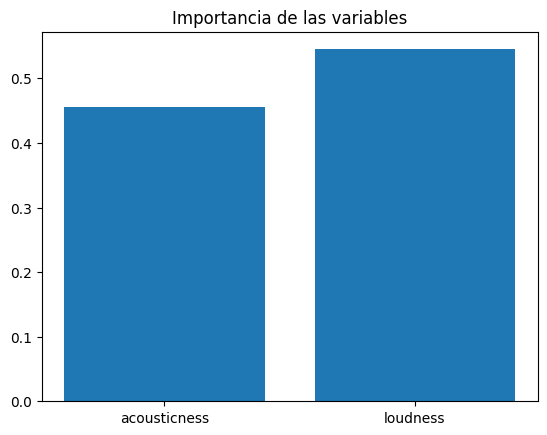

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
features = X.columns

plt.bar(features, importances)
plt.title("Importancia de las variables")
plt.show()
